In [198]:
import pandas as pd 
import math
df=pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic/titanic_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/MLDatasets/titanic/titanic_test.csv')
test_ids = test_df["PassengerId"]
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [199]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
test_df=test_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [200]:
median_age=math.floor(df.Age.median())
df.Age=df.Age.fillna(median_age)
test_df.Age=test_df.Age.fillna(median_age)

In [201]:
df.head(10)

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500
5         0       3    male  28.0   8.4583
6         0       1    male  54.0  51.8625
7         0       3    male   2.0  21.0750
8         1       3  female  27.0  11.1333
9         1       2  female  14.0  30.0708

In [202]:
inputs=df.drop('Survived',axis='columns')
target=df['Survived']

In [203]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
inputs['Sex_New']=le_sex.fit_transform(inputs['Sex'])
test_df['Sex_New']=le_sex.fit_transform(test_df['Sex'])
inputs.head()

Pclass     Sex   Age     Fare  Sex_New
0       3    male  22.0   7.2500        1
1       1  female  38.0  71.2833        0
2       3  female  26.0   7.9250        0
3       1  female  35.0  53.1000        0
4       3    male  35.0   8.0500        1

In [204]:
inputs=inputs.drop('Sex',axis='columns')
test_df=test_df.drop('Sex',axis='columns')

In [205]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [206]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [207]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [208]:
model.score(X_test,y_test)

0.7597765363128491

In [209]:
test_df.fillna(X_train.mean(), inplace=True)

In [210]:
subpred = model.predict(test_df)
subpred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [214]:
temp_df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": subpred,
                  })
temp_df.head()

PassengerId  Survived
0          892         1
1          893         0
2          894         1
3          895         1
4          896         0

In [216]:
temp_df.to_csv("/content/drive/MyDrive/MLDatasets/titanic/submission1.csv", index=False)

# **Kaggle Titanic Survivor Dataset Submission:**

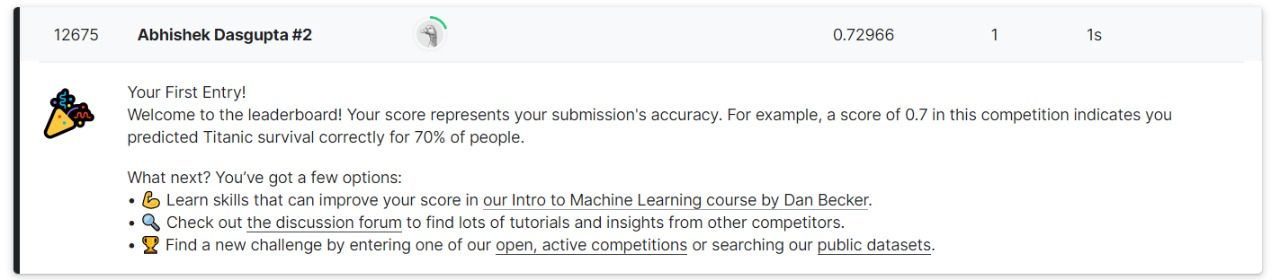